# Exploratory Data Analysis on Pima Indians Diabetes Dataset

This notebook explores the Pima-indians-diabetes dataset.

## Overview

Pima-indians-diabetes is a dataset about predicting the onset of diabetes mellitus based on certain diagnostic measurement.
.Number of instances (rows): 768
.Number of attributes (columns): 9 (8 features + 1 target label)

In [16]:
import numpy as np
import pandas as pd

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Shape of dataset: ",df.shape)
print("This is the first 5 rows of the dataset: ")
df.head()

Shape of dataset:  (768, 9)
This is the first 5 rows of the dataset: 


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

### Meaning of columns

- **Pregnancies**: Number of times pregnant  

- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test  

- **BloodPressure**: Diastolic blood pressure (mm Hg)  

- **SkinThickness**: Triceps skin fold thickness (mm)  

- **Insulin**: 2-Hour serum insulin (mu U/ml)  

- **BMI**: Body mass index (weight in kg/(height in m)^2)  

- **DiabetesPedigreeFunction**: Score representing likelihood of diabetes based on family history  

- **Age**: Age of the patient (years)  

- **Outcome**: Class variable (0 = no diabetes, 1 = diabetes)

**Outcome** column is the label of the dataset.


## Identification of variables and data types

The dataset contains 768 rows and 9 columns.  
From `df.info()`, we can see that all columns are numeric (7 are `int64`, 2 are `float64`), and there are no missing values reported.  

- **Predictor variables (8 numeric features):** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.  
- **Target variable (1 binary categorical):** Outcome (0 = no diabetes, 1 = diabetes).  

Thus, the dataset consists mainly of numerical variables, with the target variable being binary.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Univariate Analysis

### Description

- **Numberic analysis:** We have eight attribiutes:
    - **Pregnancies** 
    - **Glucose**
    - **BloodPressuser**
    - **SkinThickness**
    - **Insullin**
    - **BMI**
    - **DiabetesPedigreeFunction**
    - **Age**

- **Categorical analysis:**
    - **Outcome**

### Numberic analysis

#### Non-graphical univariate analysis

##### Statistical summary

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

numeric_features = ["Pregnancies", "Glucose", "BloodPressure", 
                    "SkinThickness", "Insulin", "BMI", 
                    "DiabetesPedigreeFunction", "Age"]
# Statistical Summary
df[numeric_features].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000

##### Distribution characteristics

In [4]:
for col in numeric_features:
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else "No mode"
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    
    print(f"{col}:")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately symmetric'})")
    print(f"  Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")
    print()

Pregnancies:
  Median: 3.00
  Mode: 1
  Skewness: 0.900 (Right-skewed)
  Kurtosis: 0.150 (Heavy-tailed)

Glucose:
  Median: 117.00
  Mode: 99
  Skewness: 0.173 (Approximately symmetric)
  Kurtosis: 0.629 (Heavy-tailed)

BloodPressure:
  Median: 72.00
  Mode: 70
  Skewness: -1.840 (Left-skewed)
  Kurtosis: 5.139 (Heavy-tailed)

SkinThickness:
  Median: 23.00
  Mode: 0
  Skewness: 0.109 (Approximately symmetric)
  Kurtosis: -0.524 (Light-tailed)

Insulin:
  Median: 30.50
  Mode: 0
  Skewness: 2.268 (Right-skewed)
  Kurtosis: 7.160 (Heavy-tailed)

BMI:
  Median: 32.00
  Mode: 32.0
  Skewness: -0.428 (Approximately symmetric)
  Kurtosis: 3.261 (Heavy-tailed)

DiabetesPedigreeFunction:
  Median: 0.37
  Mode: 0.254
  Skewness: 1.916 (Right-skewed)
  Kurtosis: 5.551 (Heavy-tailed)

Age:
  Median: 29.00
  Mode: 22
  Skewness: 1.127 (Right-skewed)
  Kurtosis: 0.631 (Heavy-tailed)



#### Graphical univariate analysis

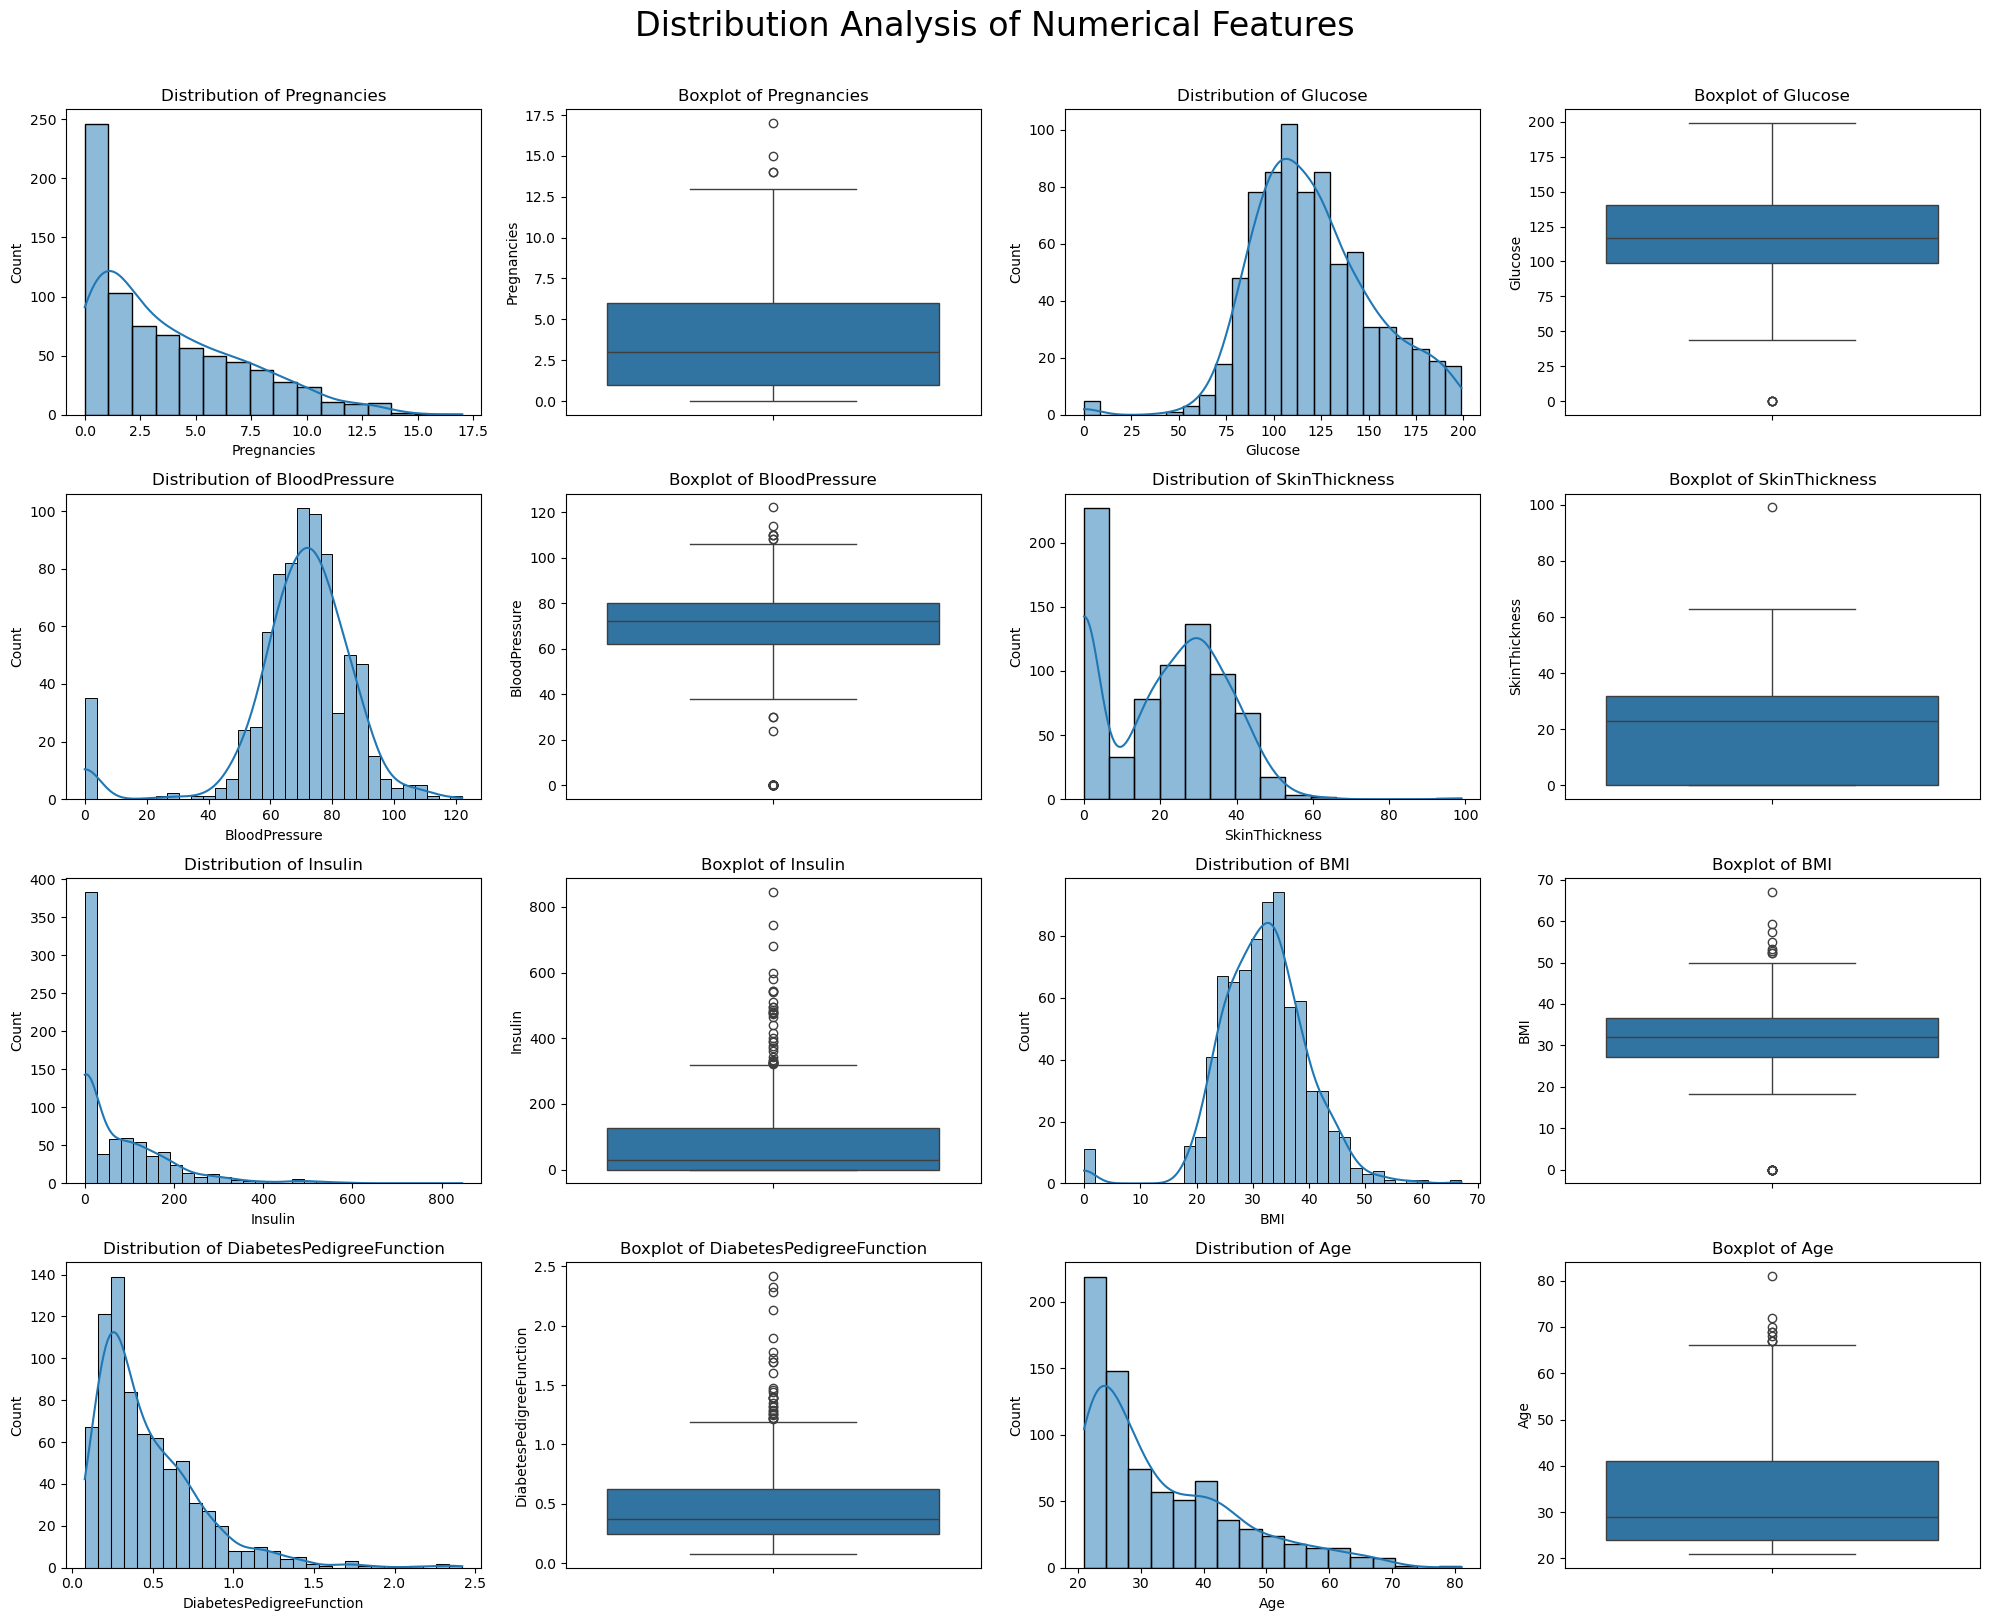

In [5]:
# Create organized subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribution Analysis of Numerical Features', fontsize=24, y=1.01)

for i, col in enumerate(numeric_features):
    # Histogram
    row, col_idx = i // 2, (i % 2) * 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[row, col_idx + 1])
    axes[row, col_idx + 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Categorical analysis

#### Non-graphical univariate analysis

In [6]:
# Basic statistics
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_percentages = df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Class Distribution:")
print(f"No Diabetes (0): {outcome_counts[0]} samples ({outcome_percentages[0]:.1f}%)")
print(f"Diabetes (1): {outcome_counts[1]} samples ({outcome_percentages[1]:.1f}%)")
print(f"Total samples: {len(df)}")

# Class imbalance ratio
imbalance_ratio = outcome_counts[0] / outcome_counts[1]
print(f"Class imbalance ratio (No Diabetes : Diabetes): {imbalance_ratio:.2f}:1")

# Determine if dataset is imbalanced
if imbalance_ratio > 1.5 or imbalance_ratio < 0.67:
    print("Dataset shows class imbalance - consider resampling techniques")
else:
    print("Dataset is relatively balanced")

Class Distribution:
No Diabetes (0): 500 samples (65.1%)
Diabetes (1): 268 samples (34.9%)
Total samples: 768
Class imbalance ratio (No Diabetes : Diabetes): 1.87:1
Dataset shows class imbalance - consider resampling techniques


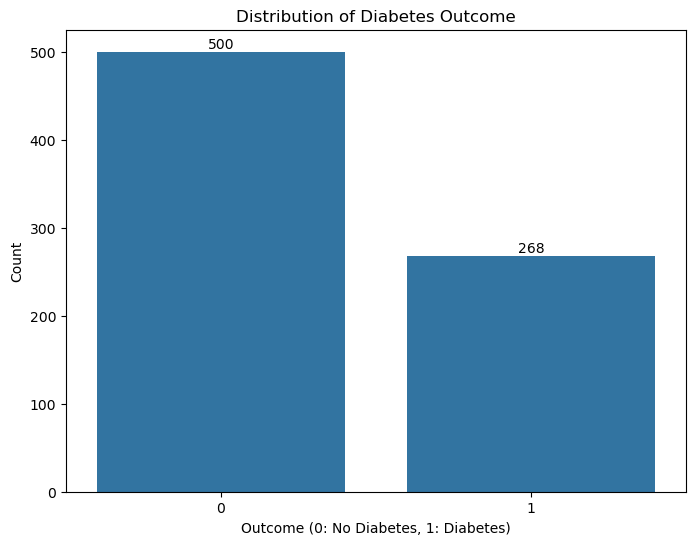

In [7]:
# Simple bar chart version
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

# Add count labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Summary

- Most of the data's distribution is acceptable in order to be used for model training since Skewness and Kurtosis values of dataset features are in the accept value range (Skewness: -2 < x < 2; Kurtosis: -7 < x < 7), except Insulin data distribution, which needs some transformations (log, square root, Box–Cox,...).
- Graphical Numberic Analysis: don't know
- The dataset show it's imbalance, which is the problem needed to be dealt with

## Bivariate Analysis

### Overview


Binary analysis is the process of finding the relationship between numerical and categorical.

**Main objectives:**

- Data Preparation: label the columns, separate input variables (features) and the outcome variable.

- Bivariate Analysis: compare the distribution of each input variable with the outcome using boxplots and violin plots.

- Statistical testing (t-test): assesses the significant differences between two Outcome groups.

- Scatter Plot: visualize the relationship between two continuous variables, differentiated by the outcome.

- Correlation Analysis: create a correlation matrix to understand the relationships between variables.

**Results from EDA will help:**

- Identify which variables are strongly related to diabetes.

- Understand the data structure before building a predictive model.

- Detect abnormalities or noteworthy data patterns.

### Preparation

#### Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### Read data and separate predictors and outcome

In [ ]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Graphical bivariate analysis

#### Use **Boxplot** to see the differences between each input variable and the outcome.

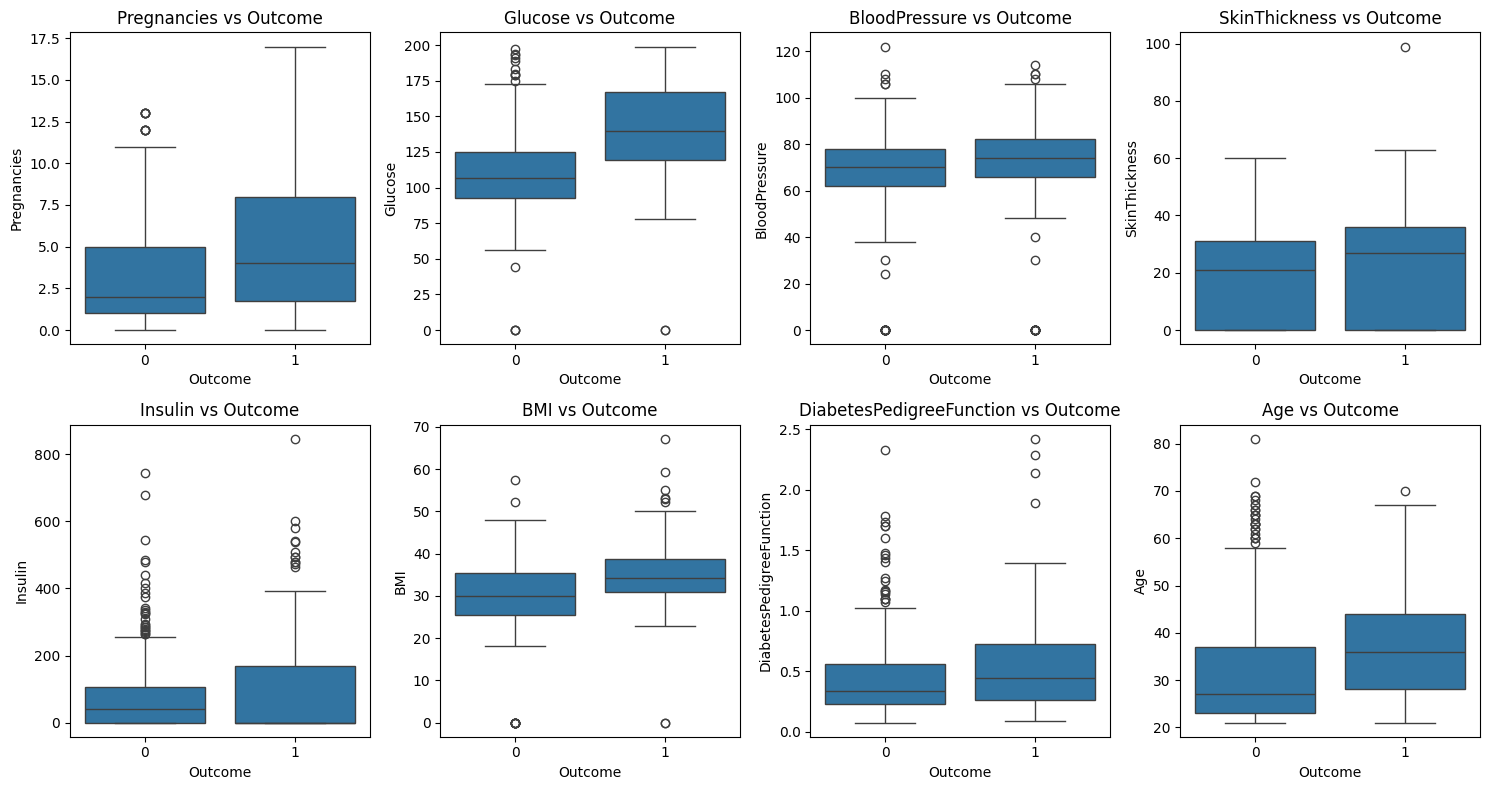

In [ ]:
cols = features.columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))
for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=label, y=df[col])
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

#### Summary

- Input values such as **Glucose, BMI, Age, Pregnancies, Insulin** tend to be higher in the Outcome = 1 group, especially Glucose.

- The variables **BloodPressure, SkinThickness, and DiabetesPedigreeFunction** have slight differences.

- Some variables have multiple outlier values or equal to 0, which need to be processed before they can be used in a machine learning model.

#### Use **Violinplot** to see the distribution and density of each input value with the outcome.

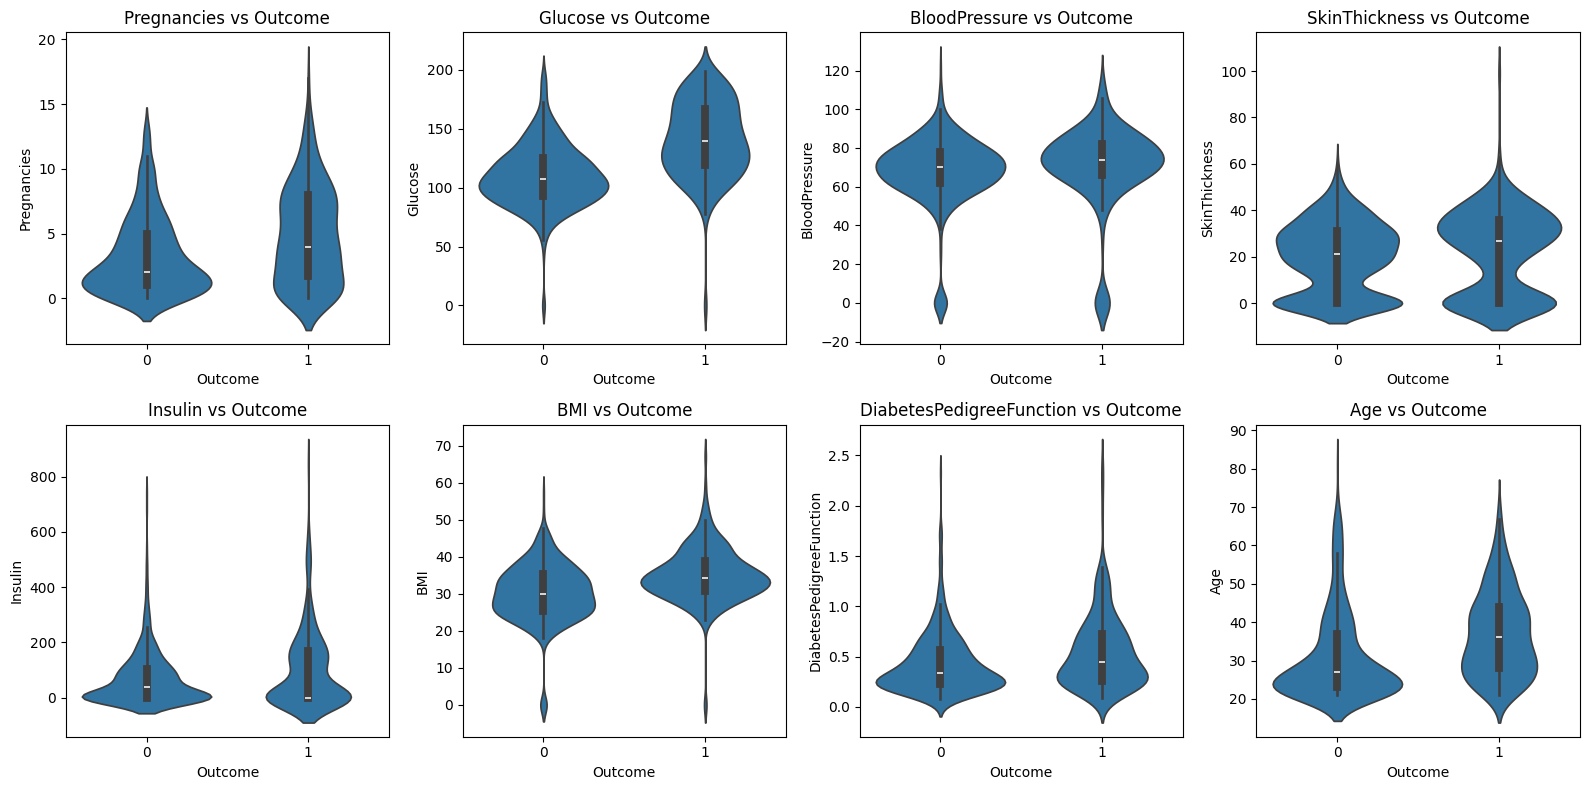

In [ ]:
cols = features.columns
n = len(cols)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=label, y=df[col])
    plt.title(f"{col} vs Outcome")

plt.tight_layout()
plt.show()

### Summary

- The **violinplot** chart shows that the input seas of **Glucose, Age, and Pregnancies** seem to be important factors to distinguish the two outcom groups.

- The initial value of **Glucose** is shown to be the strongest differentiator, which can affect the outcome.

#### Use a **Scatter Plot** to gain a better visual understanding of the relationships among the input values.

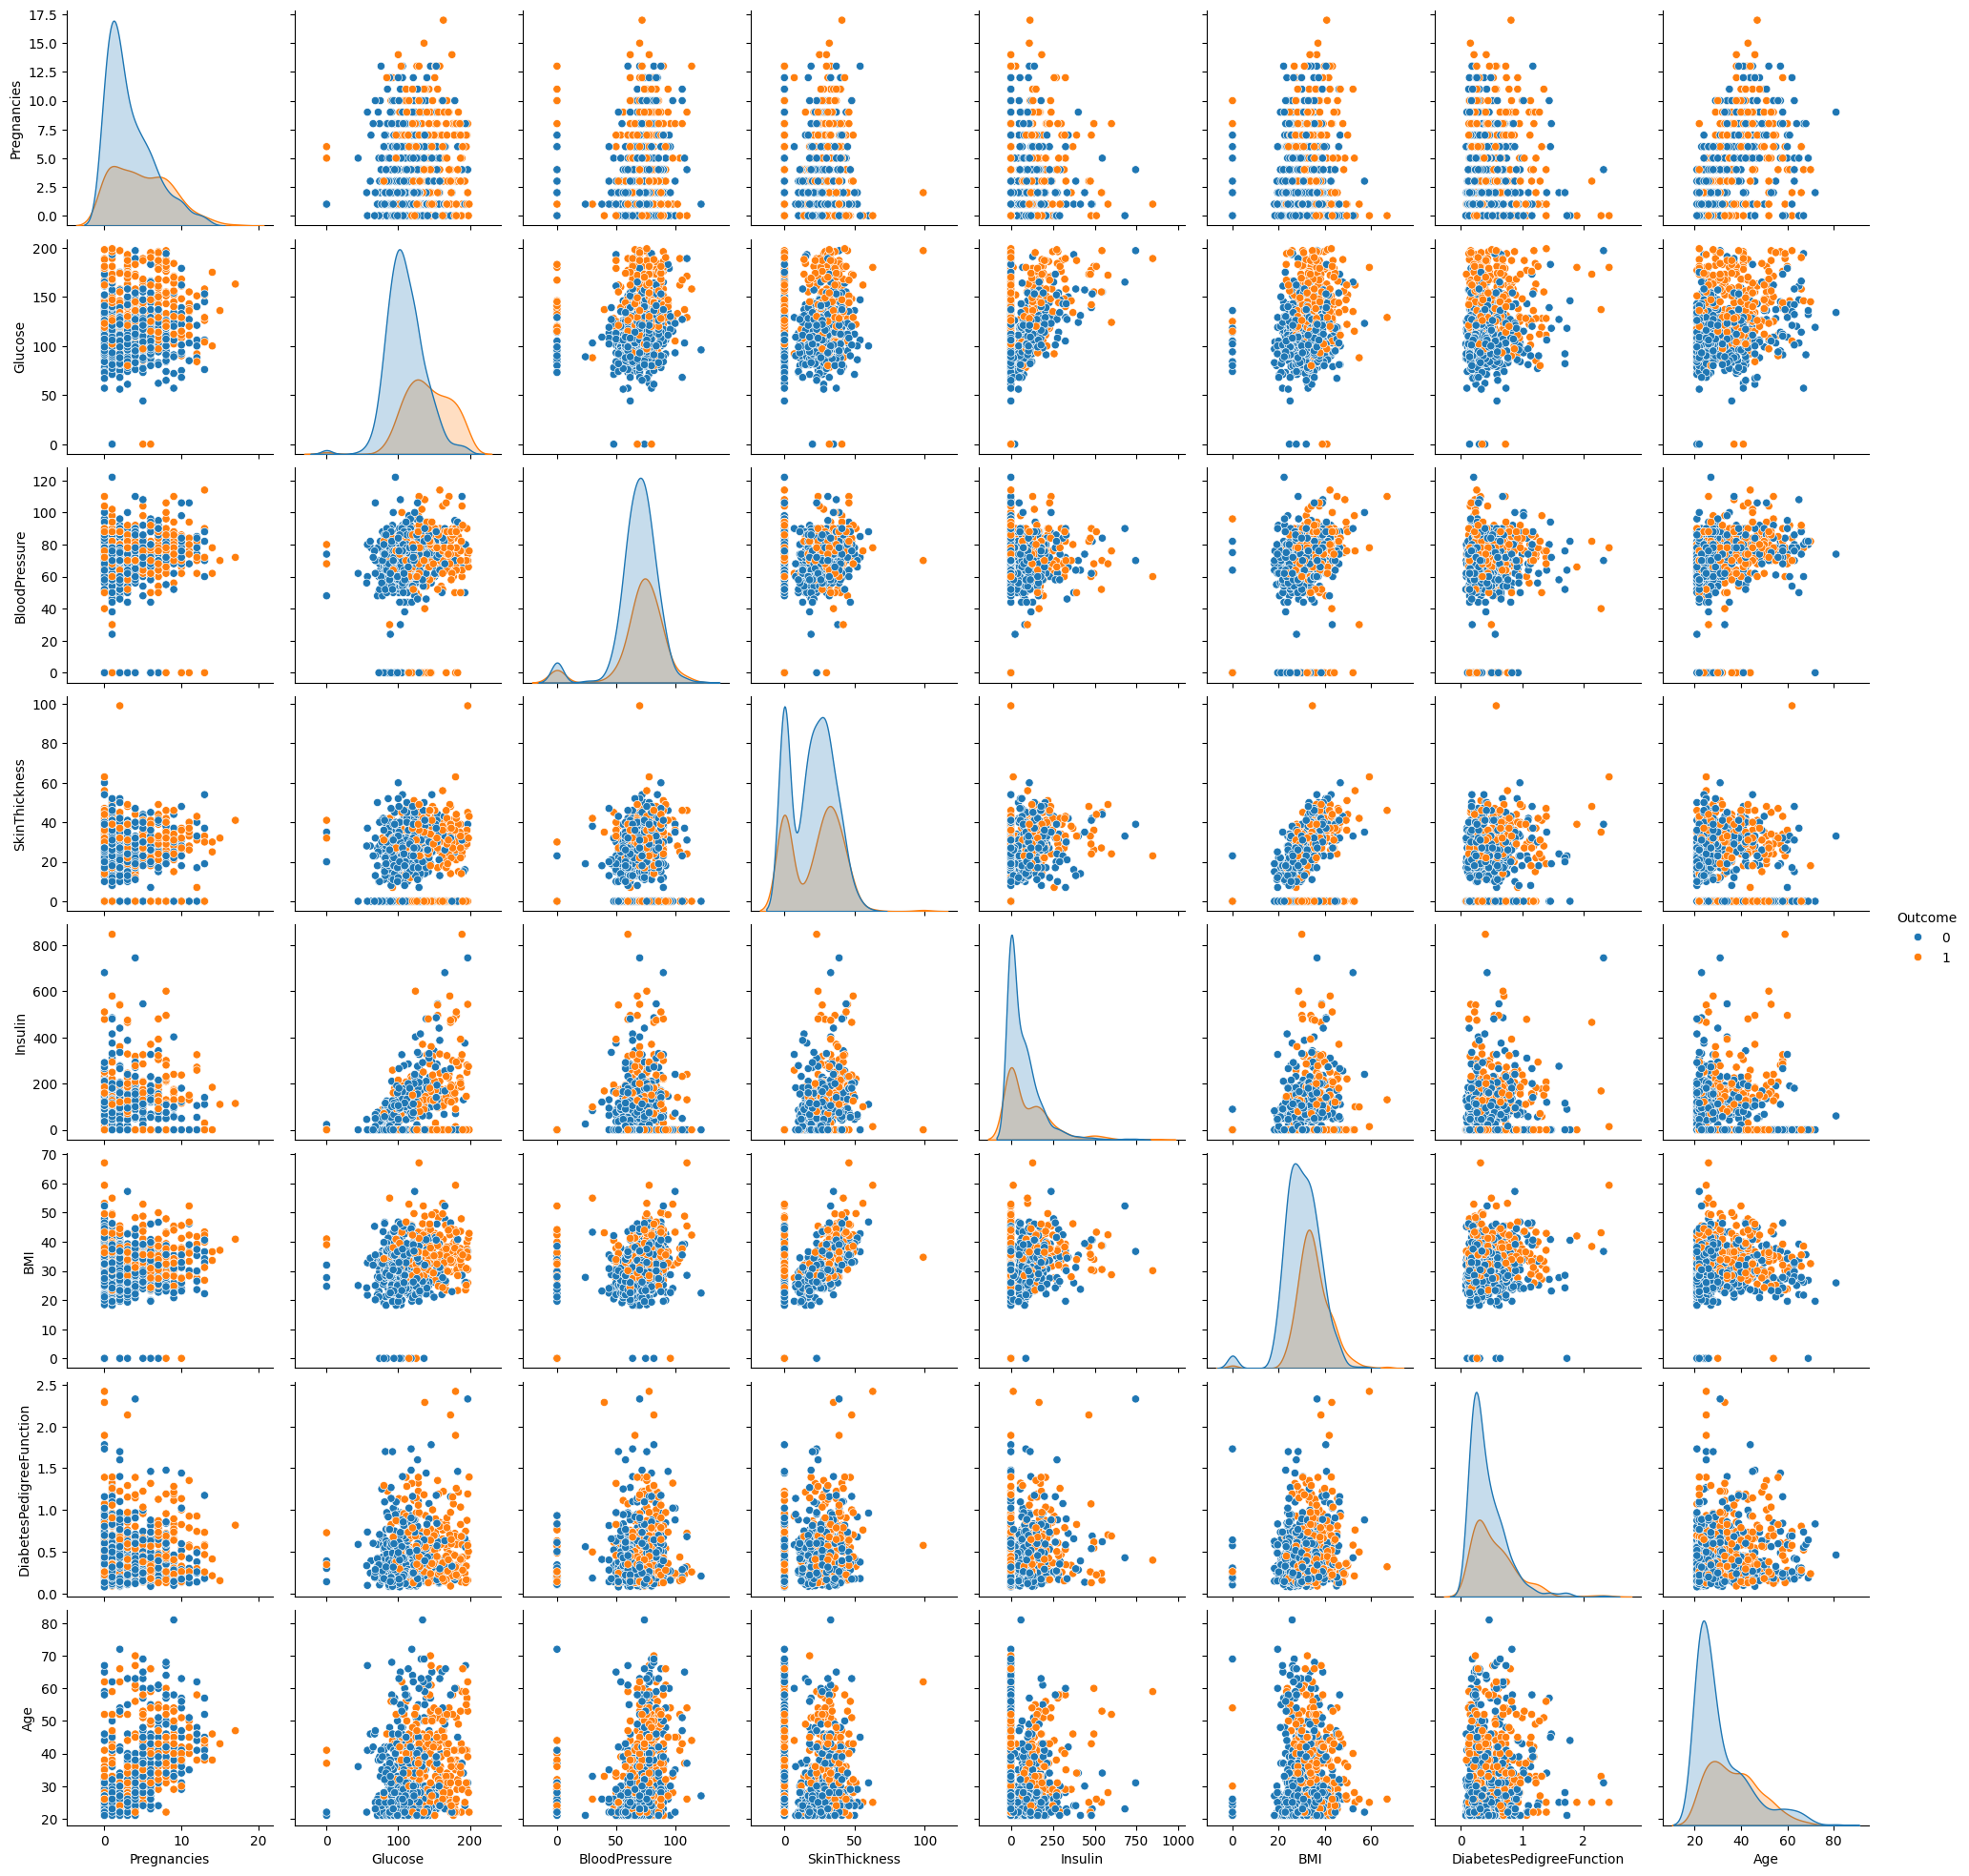

In [ ]:
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

### Summary

**Clearest separation**

- **Glucose:** Two groups are very clearly separated, outcome 1 is concentrated at high values.

- **Age:** Outcome 1 tends to be older

**Strong correlation between variables**

- **Glucose-Insulin:** A Clear Positive Correlation.

- **BMI-SkinThickness:** Slightly correlated.

- **Age-Pregnancies:** Positive correlation (advanced age → multiple pregnancies).

**Different**

- Many variables have abnormal 0 values (**SkinThickness, Insulin, BloodPressure**) - possibly missing data.

#### Use the **Correlation Matrix** to identify input values that have a strong relationship with each other and a strong relationship with the outcome.

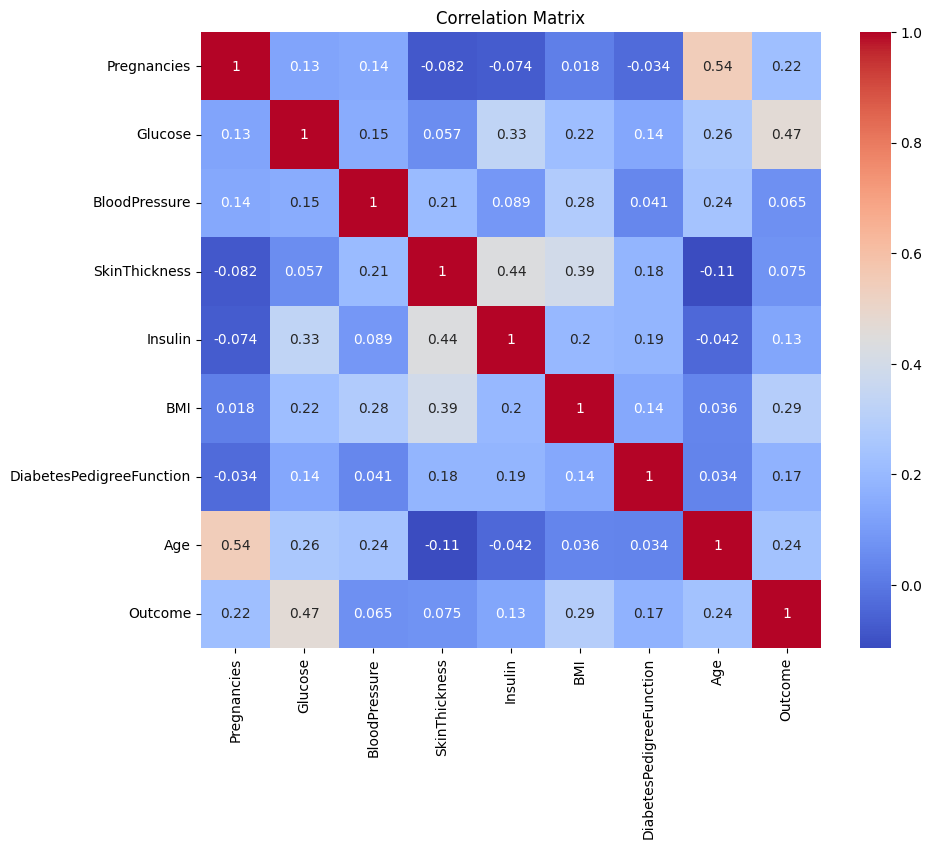

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Summary

**Strong correlation with Outcome**

- **Glucose** (0.47): The strongest correlation.

- **BMI** (0.29): Moderate correlation.

- **Age** (0.24): Slightly correlated.

- **Pregnancies** (0.22): Slightly correlated.

**Correlation between variables**

- **Pregnancies-Age** (0.54): Strongest correlation (older age → more pregnancies).

- **SkinThickness-Insulin** (0.44): Moderate correlation.

- **SkinThickness-BMI** (0.39): Moderate correlation.

- **Glucose-Insulin** (0.33): Moderate correlation.

## Multivariate Analysis

### Overview

Multivariate analysis is the process to find the relationship between three or more features in the dataset

**Visual Exploration**
- 3D scatterplots of predictors colored by outcome.
- Dimensionality reduction (PCA) → project many predictors into 2D and color by outcome.

### Preparation

#### Separate predictors and outcome

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Visual Exploration

#### Description

- Scatterplots: A way to visualize multivariate data to help classify and understand the relationships among the variables.
- Pairplot: Show all 2D scatter plots of each pair of features chosen from 3D Scatterplots.
- Dimensionality Reduction

#### 3D Scatterplots

This part will illustrate the relationships among three or more variables by visualizing it using 3D Scatterplots.

In order to perform 3D Scatterplots graph, we need to choose 3 features in the dataset.

We could not randomly choose 3 features out of 8 features to visualize it and continue doing that until all of feature combinations are used, as it is waste of time. Instead, we could rely on the result from bivariate analysis, typically the **Correlation heatmap**.

From the result, **Glucose** and **BMI** features have the strongest relationship with the outcome. Because of that, we will choose those as the two first features. For the third feature, we will choose variables that are related to diabete disease among the others. **Pregnancies** and **Age** are the most reliable information, as it has strong relationship with the outcome, so we choose those two, and visualize iteratively.

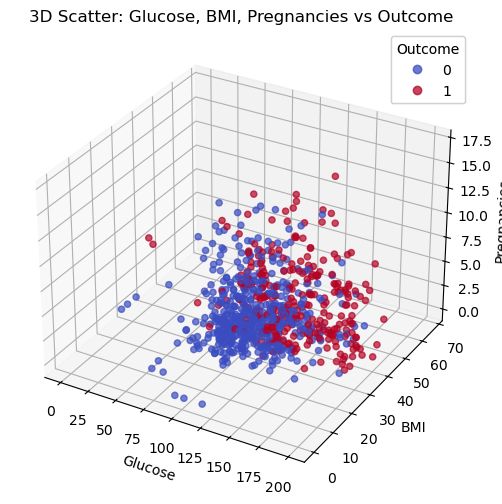

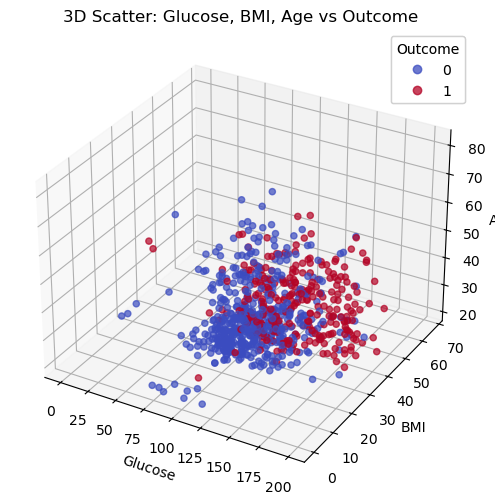

In [ ]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

The 3D scatterplots show too much overlap from the three chosen features, which can be conclude that three features alone will not fully separate diabetics and non-diabetics. It could be a hint that we should try higher dimensions or smarter approaches.

We will try increase dimensions of the Scatterplots by applying more features into the graph.
We will choose features that have the highest correlation rate with the outcome compared to others
- **4D Scatterplots**: Use all of the chosen features (Glucose, BMI, Pregnancies, Age)
- **5D Scatterplots**: Add DiabetesPedigreeFunction features
- **6D Scatterplots**: Add Insulin features

#### 4D Scatterplots (Glucose, BMI, Pregnancies, Age)

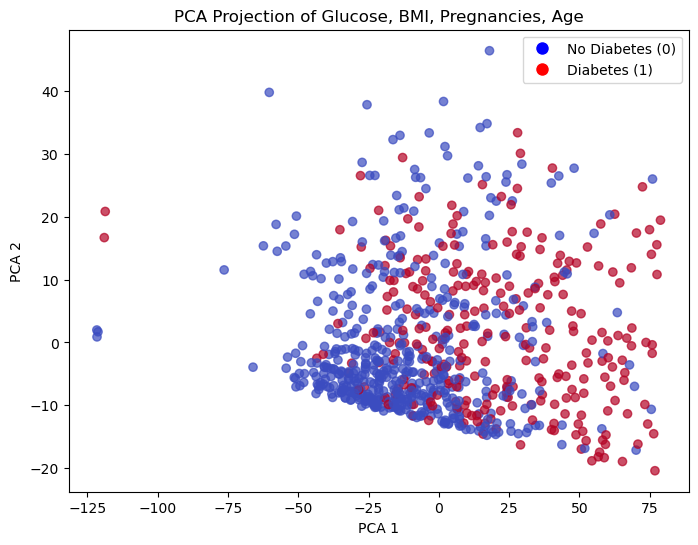

In [ ]:
# pick your features
X = df[['Glucose','BMI','Pregnancies','Age']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

#### 5D Scatterplots (Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age)

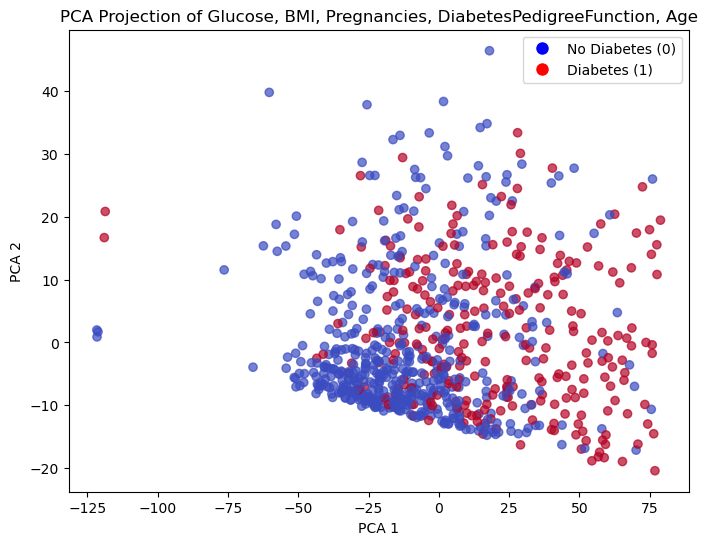

In [ ]:
# pick your features
X = df[['Glucose','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, DiabetesPedigreeFunction, Age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

#### 6D Scatterplots (Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction)

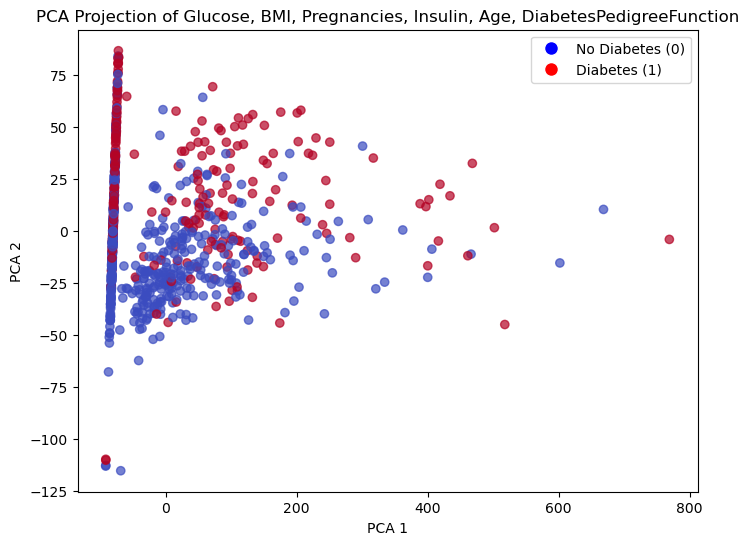

In [ ]:
# pick your features
X = df[['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()


#### Four of it

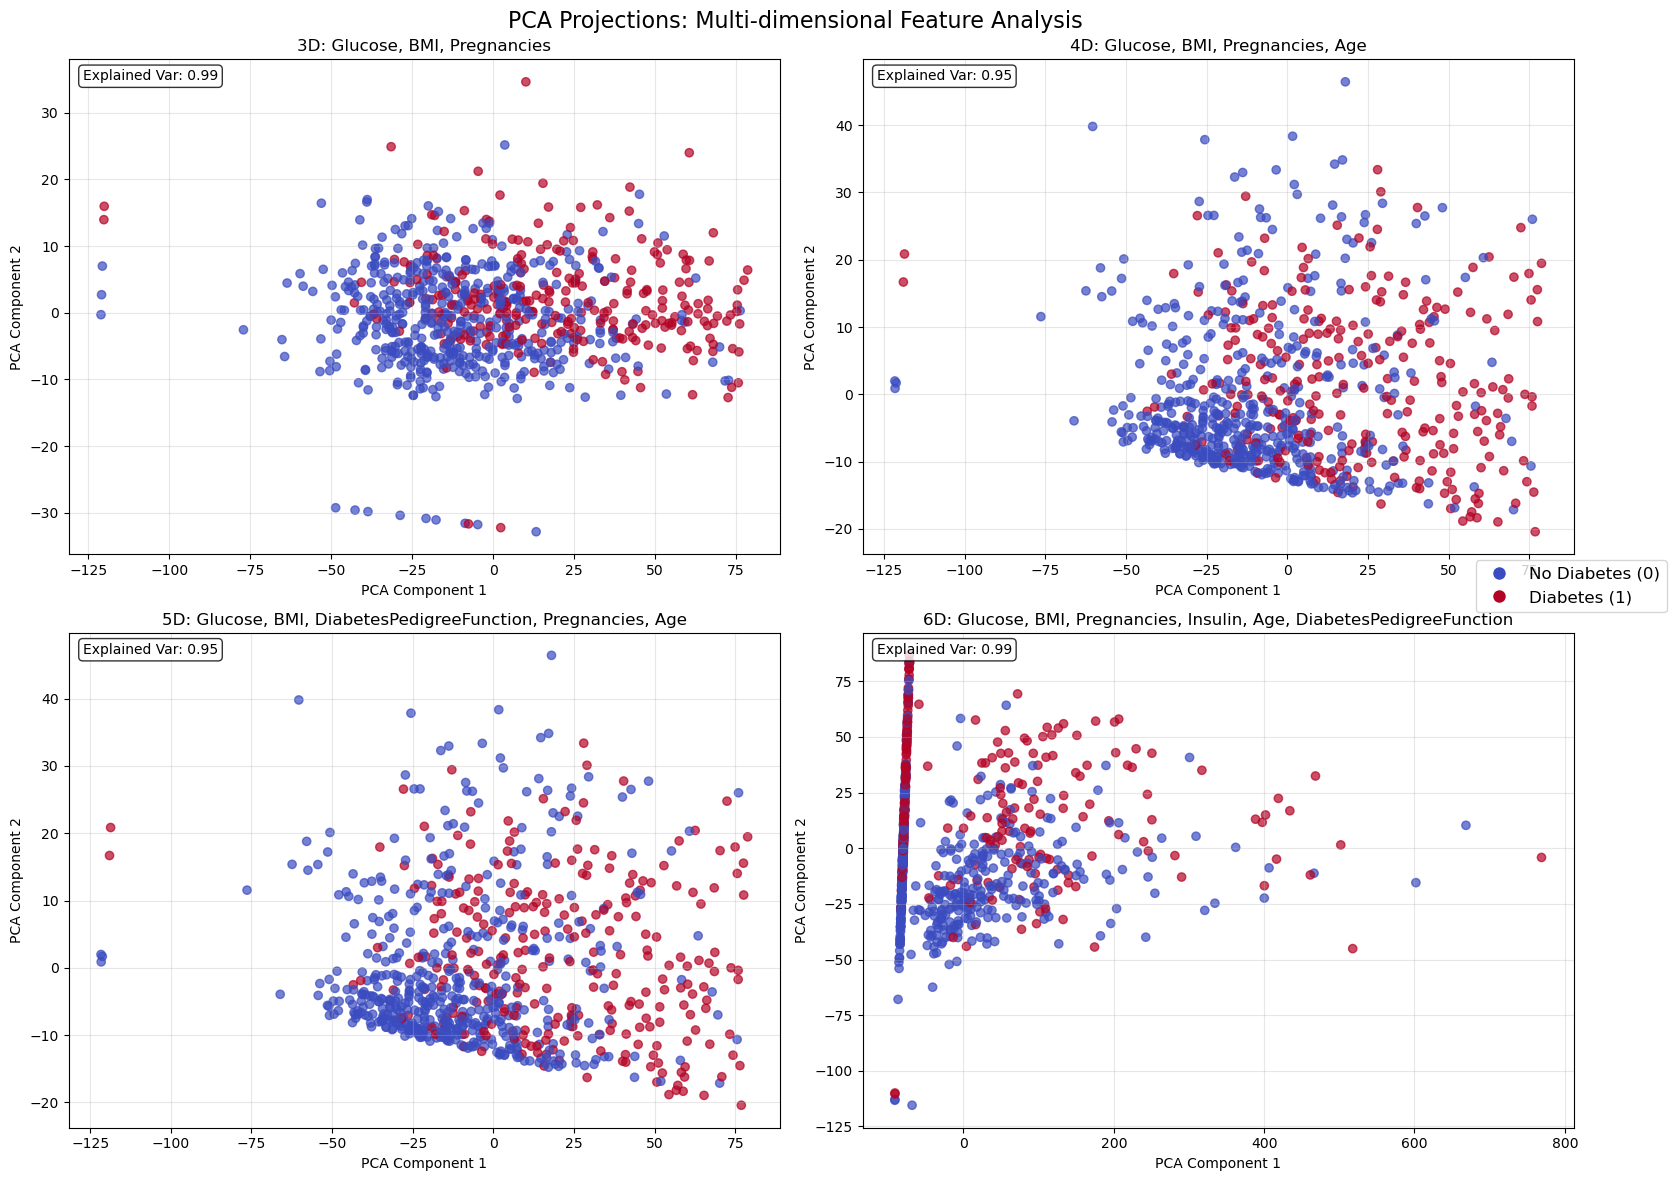

=== PCA EXPLAINED VARIANCE ANALYSIS ===
3D: Glucose, BMI, Pregnancies:
  PC1: 0.936 (93.6%)
  PC2: 0.054 (5.4%)
  Total: 0.990 (99.0%)

4D: Glucose, BMI, Pregnancies, Age:
  PC1: 0.840 (84.0%)
  PC2: 0.106 (10.6%)
  Total: 0.946 (94.6%)

5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age:
  PC1: 0.840 (84.0%)
  PC2: 0.106 (10.6%)
  Total: 0.946 (94.6%)

6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction:
  PC1: 0.923 (92.3%)
  PC2: 0.063 (6.3%)
  Total: 0.987 (98.7%)



In [ ]:
# Define the feature combinations
feature_combinations = [
    (['Glucose', 'BMI', 'Pregnancies'], '3D: Glucose, BMI, Pregnancies'),
    (['Glucose','BMI','Pregnancies','Age'], '4D: Glucose, BMI, Pregnancies, Age'),
    (['Glucose','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies'], '5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age'),
    (['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction'], '6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction'),
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('PCA Projections: Multi-dimensional Feature Analysis', fontsize=16, y=0.98)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create PCA plots
for i, (features, title) in enumerate(feature_combinations):
    # Prepare data
    X = df[features]
    y = df['Outcome']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create scatter plot
    scatter = axes[i].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    
    # Add explained variance to title
    explained_var = pca.explained_variance_ratio_
    axes[i].text(0.02, 0.98, f'Explained Var: {sum(explained_var):.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a single legend instead of colorbar
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#3A4CC0', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B40426', markersize=10, label='Diabetes (1)')]

# Position legend outside the plot area
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12)


plt.tight_layout()
plt.show()

# Print explained variance for each combination
print("=== PCA EXPLAINED VARIANCE ANALYSIS ===")
for features, title in feature_combinations:
    X = df[features]
    pca = PCA(n_components=2)
    pca.fit(X)
    explained_var = pca.explained_variance_ratio_
    print(f"{title}:")
    print(f"  PC1: {explained_var[0]:.3f} ({explained_var[0]*100:.1f}%)")
    print(f"  PC2: {explained_var[1]:.3f} ({explained_var[1]*100:.1f}%)")
    print(f"  Total: {sum(explained_var):.3f} ({sum(explained_var)*100:.1f}%)")
    print()

#### Class separation analysis of four scatterplots

Since it is hard to determine which dimension is better than which, we will do seperation analysis to see that clearer

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Simple separation analysis
print("\n=== CLASS SEPARATION ANALYSIS ===")
print("Higher values = Better separation between classes\n")

separation_results = []

for features, title in feature_combinations:
    X = df[features]
    y = df['Outcome']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Calculate separation metrics
    silhouette = silhouette_score(X_pca, y)
    
    # Calculate distance between class centers
    class_0_center = X_pca[y == 0].mean(axis=0)
    class_1_center = X_pca[y == 1].mean(axis=0)
    center_distance = np.linalg.norm(class_1_center - class_0_center)
    
    # Calculate overlap percentage (simple method)
    # Find the range overlap in each dimension
    c0_x_range = [X_pca[y == 0, 0].min(), X_pca[y == 0, 0].max()]
    c1_x_range = [X_pca[y == 1, 0].min(), X_pca[y == 1, 0].max()]
    c0_y_range = [X_pca[y == 0, 1].min(), X_pca[y == 0, 1].max()]
    c1_y_range = [X_pca[y == 1, 1].min(), X_pca[y == 1, 1].max()]
    
    # Calculate overlap in x and y dimensions
    x_overlap = max(0, min(c0_x_range[1], c1_x_range[1]) - max(c0_x_range[0], c1_x_range[0]))
    y_overlap = max(0, min(c0_y_range[1], c1_y_range[1]) - max(c0_y_range[0], c1_y_range[0]))
    
    x_total = max(c0_x_range[1], c1_x_range[1]) - min(c0_x_range[0], c1_x_range[0])
    y_total = max(c0_y_range[1], c1_y_range[1]) - min(c0_y_range[0], c1_y_range[0])
    
    overlap_percentage = ((x_overlap/x_total) + (y_overlap/y_total)) / 2 * 100
    
    separation_results.append({
        'title': title,
        'silhouette_score': silhouette,
        'center_distance': center_distance,
        'overlap_percentage': overlap_percentage
    })
    
    print(f"{title}:")
    print(f"  Silhouette Score: {silhouette:.3f} (range: -1 to 1, higher = better)")
    print(f"  Center Distance: {center_distance:.2f}")
    print(f"  Overlap: {overlap_percentage:.1f}% (lower = better separation)")
    print(f"  Separation: {100-overlap_percentage:.1f}%")


=== CLASS SEPARATION ANALYSIS ===
Higher values = Better separation between classes

3D: Glucose, BMI, Pregnancies:
  Silhouette Score: 0.198 (range: -1 to 1, higher = better)
  Center Distance: 31.67
  Overlap: 91.7% (lower = better separation)
  Separation: 8.3%
4D: Glucose, BMI, Pregnancies, Age:
  Silhouette Score: 0.195 (range: -1 to 1, higher = better)
  Center Distance: 32.07
  Overlap: 86.4% (lower = better separation)
  Separation: 13.6%
5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age:
  Silhouette Score: 0.195 (range: -1 to 1, higher = better)
  Center Distance: 32.07
  Overlap: 86.4% (lower = better separation)
  Separation: 13.6%
6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction:
  Silhouette Score: 0.117 (range: -1 to 1, higher = better)
  Center Distance: 44.92
  Overlap: 92.3% (lower = better separation)
  Separation: 7.7%


The 4D and 5D Scatterplots have the highest proportion of class seperation, and their Silhouette score are the second highest in the entire Scatterplots

### Summary

- Adding too many features is not always a good thing in training ML models.
- Choosing 5 features Glucose, BMI, Pregnancies, Age, and DiabetesPedigreeFunction is the best option if we want to approach the way that choosing features that impact the outcome most

## Detect anomalies and impossible values

### Description

This section focus on identifying physiologically impossible values or highly unrealistic values within the dataset that may indicate data collection errors or missing value encoding issues.

Based on medical literature and physiological constraints, the following ranges represent realistic values for each feature:

- **Pregnancies: x ≥ 0**: Negative pregnancy counts are impossible.

- **Glucose: 50 ≤ x ≤ 500 mg/dL**: Values below 50 mg/dL typically indicate severe hypoglycemia requiring immediate medical intervention, while values above 500 mg/dL represent extreme hyperglycemia that would likely be fatal without treatment. Zero values are impossible for living subjects.

- **BloodPressure: 40 ≤ x ≤ 200 mmHg**: Diastolic blood pressure below 40 mmHg or above 200 mmHg represents extreme physiological conditions incompatible with normal life. Zero values are impossible for living subjects.

- **SkinThickness: 5 ≤ x ≤ 50 mm**: Triceps skinfold thickness below 5 mm or above 50 mm is extremely rare, even in cases of severe malnutrition or morbid obesity. Zero values are physiologically impossible.

- **Insulin: x ≥ 2 μU/ml**: Serum insulin levels cannot be negative. Values below 2 μU/ml are extremely rare even in Type 1 diabetes patients. Zero values likely indicate missing data rather than true measurements.

- **BMI: 10 ≤ x ≤ 70**: BMI values below 10 kg/m² are incompatible with life, while values above 70 kg/m² are extraordinarily rare even in cases of extreme obesity. Zero values are impossible.

- **DiabetesPedigreeFunction: x ≥ 0**: This is a calculated score representing genetic predisposition to diabetes based on family history. Negative values would be meaningless in this context.

- **Age: x > 0**: Age values must be positive integers. Zero or negative values are impossible.


### Detection

#### Detection of impossible value

In [8]:
# Check for zeros in features where zero is impossible
zero_checks = {
    'Pregnancies': (df['Pregnancies'] < 0),
    'Glucose': (df['Glucose'] <= 0),
    'BloodPressure': (df['BloodPressure'] <= 0), 
    'SkinThickness': (df['SkinThickness'] <= 0),
    'Insulin': (df['Insulin'] <= 0),
    'BMI': (df['BMI'] <= 0),
    'Age': (df['Age'] <= 0)
}

for feature, condition in zero_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} zero values ({percentage:.1f}%)")

Pregnancies: 0 zero values (0.0%)
Glucose: 5 zero values (0.7%)
BloodPressure: 35 zero values (4.6%)
SkinThickness: 227 zero values (29.6%)
Insulin: 374 zero values (48.7%)
BMI: 11 zero values (1.4%)
Age: 0 zero values (0.0%)


#### Detection of outlier values

In [9]:
# Check for values outside physiologically reasonable ranges
extreme_checks = {
    'Glucose': ((df['Glucose'] > 0) & (df['Glucose'] < 50)) | (df['Glucose'] > 500),
    'BloodPressure': ((df['BloodPressure'] > 0) & (df['BloodPressure'] < 40)) | (df['BloodPressure'] > 200),
    'SkinThickness': ((df['SkinThickness'] > 0) & (df['SkinThickness'] < 5)) | (df['SkinThickness'] > 50),
    'Insulin': ((df['Insulin'] > 0) & (df['Insulin'] < 2)) | (df['Insulin'] > 1000),
    'BMI': ((df['BMI'] > 0) & (df['BMI'] < 10)) | (df['BMI'] > 70),
    'DiabetesPedigreeFunction': (df['DiabetesPedigreeFunction'] < 0),
}

for feature, condition in extreme_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} extreme values ({percentage:.1f}%)")

Glucose: 1 extreme values (0.1%)
BloodPressure: 4 extreme values (0.5%)
SkinThickness: 9 extreme values (1.2%)
Insulin: 0 extreme values (0.0%)
BMI: 0 extreme values (0.0%)
DiabetesPedigreeFunction: 0 extreme values (0.0%)


### Summary

- There are numorous anomalies values in this dataset
- Insulin column has the largest proportion of anomalies values (48.7%)

# The end